Importing

In [7]:
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [13]:
%run "src/dataloading.ipynb"
%run "src/training.ipynb"
%run "src/evaluate.ipynb"
%run "src/visualizations.ipynb"
%run "model_architectures.ipynb"

Data loaded and split into training, validation and testing datasets


Training

In [5]:
model = MRI_CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs=10

from tqdm import tqdm

# Create a tqdm progress bar
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion= criterion, device=device)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:  10%|█         | 1/10 [00:15<02:15, 15.06s/epoch]

Epoch [1/10] Train Loss: 1.3022 Train Accuracy: 40.76% Validation Loss: 1.5135 Validation Accuracy: 34.25%


Training:  20%|██        | 2/10 [00:27<01:49, 13.67s/epoch]

Epoch [2/10] Train Loss: 1.0370 Train Accuracy: 57.08% Validation Loss: 0.9189 Validation Accuracy: 61.55%


Training:  30%|███       | 3/10 [00:40<01:33, 13.29s/epoch]

Epoch [3/10] Train Loss: 0.7512 Train Accuracy: 69.63% Validation Loss: 0.7758 Validation Accuracy: 68.98%


Training:  40%|████      | 4/10 [00:53<01:19, 13.19s/epoch]

Epoch [4/10] Train Loss: 0.4988 Train Accuracy: 81.31% Validation Loss: 0.8079 Validation Accuracy: 63.97%


Training:  50%|█████     | 5/10 [01:06<01:04, 12.93s/epoch]

Epoch [5/10] Train Loss: 0.3370 Train Accuracy: 87.45% Validation Loss: 0.7834 Validation Accuracy: 76.09%


Training:  60%|██████    | 6/10 [01:18<00:51, 12.77s/epoch]

Epoch [6/10] Train Loss: 0.1620 Train Accuracy: 94.02% Validation Loss: 0.9093 Validation Accuracy: 79.32%


Training:  70%|███████   | 7/10 [01:31<00:38, 12.72s/epoch]

Epoch [7/10] Train Loss: 0.0854 Train Accuracy: 97.47% Validation Loss: 0.8114 Validation Accuracy: 81.26%


Training:  80%|████████  | 8/10 [01:43<00:25, 12.72s/epoch]

Epoch [8/10] Train Loss: 0.0638 Train Accuracy: 97.90% Validation Loss: 0.9119 Validation Accuracy: 79.81%


Training:  90%|█████████ | 9/10 [01:56<00:12, 12.67s/epoch]

Epoch [9/10] Train Loss: 0.0962 Train Accuracy: 96.72% Validation Loss: 0.9869 Validation Accuracy: 73.99%


Training: 100%|██████████| 10/10 [02:09<00:00, 12.95s/epoch]

Epoch [10/10] Train Loss: 0.0566 Train Accuracy: 98.01% Validation Loss: 1.0170 Validation Accuracy: 75.77%


In [6]:
# Create a tqdm progress bar for testing
import time


test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()  # Record the start time
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()  # Record the end time

    epoch_time = end_time - start_time  # Calculate the time for the current epoch

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

# Print the average test loss and accuracy
avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:  10%|█         | 1/10 [00:01<00:15,  1.68s/epoch]

Testing Epoch [1/10] Test Loss: 1.0295 Test Accuracy: 75.97% Time per Epoch: 1.68 seconds


Testing:  20%|██        | 2/10 [00:03<00:11,  1.49s/epoch]

Testing Epoch [2/10] Test Loss: 1.0505 Test Accuracy: 75.97% Time per Epoch: 1.36 seconds


Testing:  30%|███       | 3/10 [00:04<00:10,  1.45s/epoch]

Testing Epoch [3/10] Test Loss: 1.0581 Test Accuracy: 75.97% Time per Epoch: 1.41 seconds


Testing:  40%|████      | 4/10 [00:05<00:08,  1.43s/epoch]

Testing Epoch [4/10] Test Loss: 1.0295 Test Accuracy: 75.97% Time per Epoch: 1.40 seconds


Testing:  50%|█████     | 5/10 [00:07<00:07,  1.41s/epoch]

Testing Epoch [5/10] Test Loss: 1.0336 Test Accuracy: 75.97% Time per Epoch: 1.37 seconds


Testing:  60%|██████    | 6/10 [00:08<00:05,  1.40s/epoch]

Testing Epoch [6/10] Test Loss: 1.0321 Test Accuracy: 75.97% Time per Epoch: 1.39 seconds


Testing:  70%|███████   | 7/10 [00:09<00:04,  1.40s/epoch]

Testing Epoch [7/10] Test Loss: 1.0395 Test Accuracy: 75.97% Time per Epoch: 1.38 seconds


Testing:  80%|████████  | 8/10 [00:11<00:02,  1.39s/epoch]

Testing Epoch [8/10] Test Loss: 1.0252 Test Accuracy: 75.97% Time per Epoch: 1.39 seconds


Testing:  90%|█████████ | 9/10 [00:12<00:01,  1.40s/epoch]

Testing Epoch [9/10] Test Loss: 1.0375 Test Accuracy: 75.97% Time per Epoch: 1.41 seconds


Testing: 100%|██████████| 10/10 [00:14<00:00,  1.41s/epoch]

Testing Epoch [10/10] Test Loss: 1.0787 Test Accuracy: 75.97% Time per Epoch: 1.36 seconds
Average Test Loss: 1.0414
Average Test Accuracy: 75.97%


Model Classification:

              precision    recall  f1-score   support

           0       0.32      0.32      0.32       546
           1       0.31      0.31      0.31       560
           2       0.11      0.11      0.11       254
           3       0.25      0.25      0.25       497

    accuracy                           0.27      1857
   macro avg       0.25      0.25      0.25      1857
weighted avg       0.27      0.27      0.27      1857

              precision    recall  f1-score   support

           0       0.19      0.12      0.15       169
           1       0.25      0.34      0.29       175
           2       0.14      0.13      0.14        97
           3       0.28      0.28      0.28       178

    accuracy                           0.23       619
   macro avg       0.22      0.22      0.21       619
weighted avg       0.23      0.23      0.23       619

              precision    recall  f1-score   support

           0       0.30      0.18      0.23       186
           1       0.

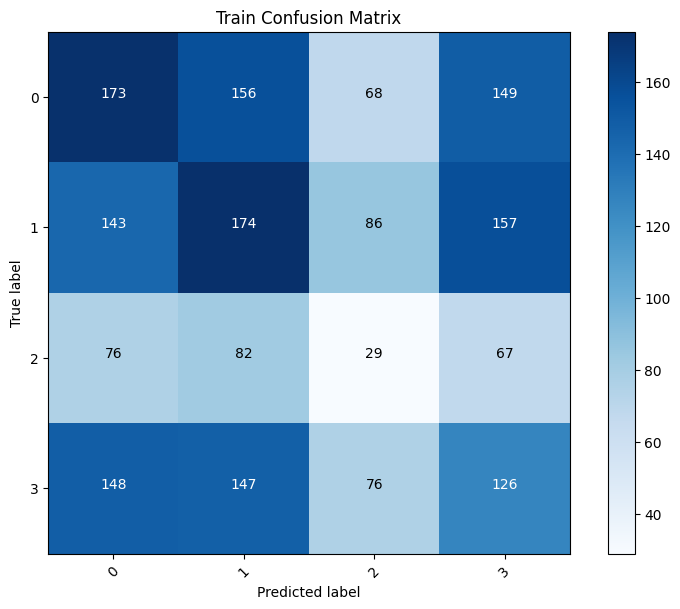

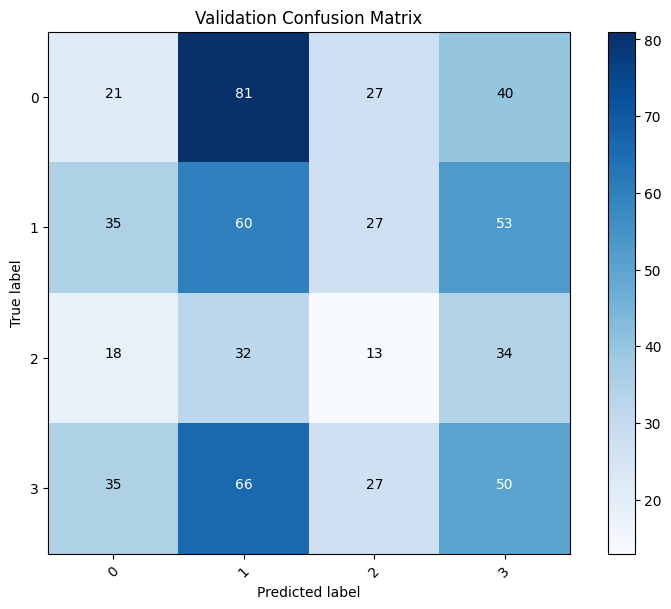

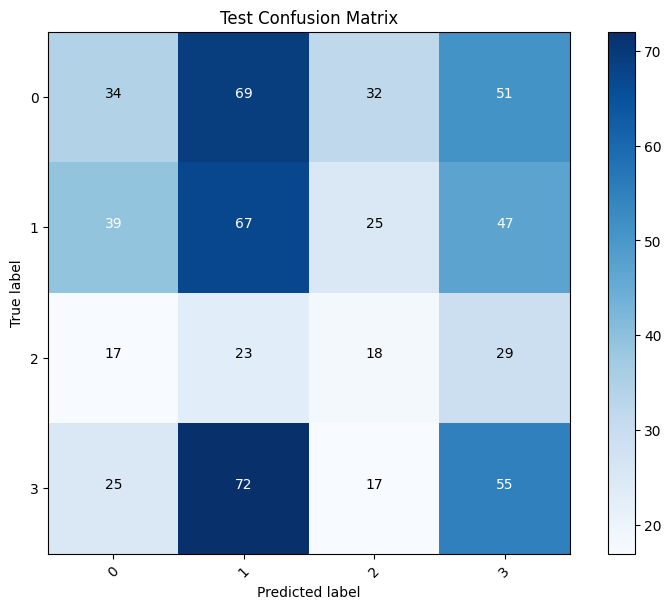

In [14]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

print(classification_report(train_labels, train_preds))
print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')



plt.show()